In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
directory = 'C:/Users/DELL/Desktop/FDA PROJECT/Dataset/Training'
directory2 = 'C:/Users/DELL/Desktop/FDA PROJECT/Dataset/Testing'

In [3]:
File=[]
for file in os.listdir(directory):
    File+=[file]
print(File)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [4]:
dataset=[]
mapping={'no_tumor':0, 'pituitary_tumor':1, 'meningioma_tumor':2, 'glioma_tumor':3}
count=0

for file in os.listdir(directory):
    path=os.path.join(directory,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(150,150))
        image=img_to_array(image)
        image=image/255.0
        dataset.append([image,count])     
    count=count+1

In [5]:
testset=[]
mapping={'no_tumor':0, 'pituitary_tumor':1, 'meningioma_tumor':2, 'glioma_tumor':3}
count=0

for file in os.listdir(directory2):
    path=os.path.join(directory2,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(150,150))
        image=img_to_array(image)
        image=image/255.0
        testset.append([image,count])         
    count=count+1

In [6]:
data,labels0=zip(*dataset)
test,testlabels0=zip(*testset)

In [7]:
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)
print(data.shape)
print(labels.shape)

(2870, 150, 150, 3)
(2870, 4)


In [8]:
testlabels1=to_categorical(testlabels0)
test=np.array(test)
testlabels=np.array(testlabels1)
print(test.shape)
print(testlabels.shape)

(394, 150, 150, 3)
(394, 4)


In [9]:
data2=data.reshape(-1,150,150,3)
test2=test.reshape(-1,150,150,3)

In [10]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [11]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(2296, 150, 150, 3)
(574, 150, 150, 3)
(2296, 4)
(574, 4)


In [12]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                    width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [13]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(150,150,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

In [14]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(4, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=30)

Epoch 1/30
72/72 [==============================] - 229s 3s/step - loss: 0.7820 - accuracy: 0.6790 - val_loss: 0.5832 - val_accuracy: 0.7683
Epoch 2/30
72/72 [==============================] - 204s 3s/step - loss: 0.5170 - accuracy: 0.8031 - val_loss: 0.5850 - val_accuracy: 0.7718
Epoch 3/30
72/72 [==============================] - 201s 3s/step - loss: 0.4970 - accuracy: 0.8079 - val_loss: 0.5354 - val_accuracy: 0.7875
Epoch 4/30
72/72 [==============================] - 208s 3s/step - loss: 0.4476 - accuracy: 0.8262 - val_loss: 0.5050 - val_accuracy: 0.8206
Epoch 5/30
72/72 [==============================] - 212s 3s/step - loss: 0.4188 - accuracy: 0.8371 - val_loss: 0.4865 - val_accuracy: 0.8293
Epoch 6/30
72/72 [==============================] - 212s 3s/step - loss: 0.3898 - accuracy: 0.8489 - val_loss: 0.4924 - val_accuracy: 0.8101
Epoch 7/30
72/72 [==============================] - 206s 3s/step - loss: 0.3779 - accuracy: 0.8550 - val_loss: 0.5586 - val_accuracy: 0.7944
Epoch 8/30
72

In [16]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88       157
           1       0.80      0.79      0.79       170
           2       0.93      0.81      0.87        81
           3       0.82      0.99      0.90       166

    accuracy                           0.86       574
   macro avg       0.87      0.85      0.86       574
weighted avg       0.86      0.86      0.86       574



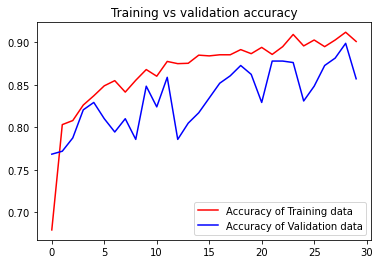

<Figure size 432x288 with 0 Axes>

In [17]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

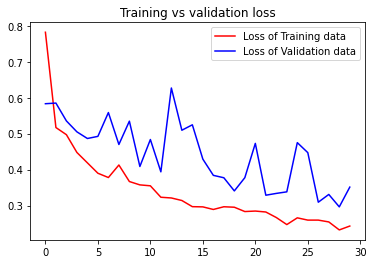

<Figure size 432x288 with 0 Axes>

In [18]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

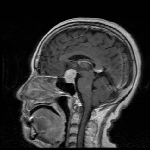

In [19]:
load_img("C:/Users/DELL/Desktop/FDA PROJECT/Dataset/Testing/pituitary_tumor/image(30).jpg",target_size=(150,150))

In [20]:
image=load_img("C:/Users/DELL/Desktop/FDA PROJECT/Dataset/Testing/pituitary_tumor/image(30).jpg",target_size=(150,150))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [21]:
reverse_mapping={0:'glioma_tumor', 1:'meningioma_tumor', 2:'no_tumor', 3:'pituitary_tumor'}

def mapper(value):
    return reverse_mapping[value]

prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

Prediction is pituitary_tumor.


In [22]:
print(test.shape)
prediction2=model.predict(test)
print(prediction2.shape)

PRED=[]
for item in prediction2:
    value2=np.argmax(item)      
    PRED+=[value2]

(394, 150, 150, 3)
(394, 4)


In [23]:
ANS=testlabels0

In [24]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.733502538071066
